# Multilinear Regression

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

## Read clean dataset

In [2]:
df = pd.read_csv('clean.csv')
df.head()

,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,arr_time_Afternoon,arr_time_Evening,arr_time_Morning,arr_time_Night,...,dep_time_Morning,dep_time_Night,airline_Air India,airline_Vistara,time_taken,stop,price,distance,day,month
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,7.000000,1,62045,1658.369839,28,3
1,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,11.083333,1,57920,1750.688589,9,3
2,0,0,0,0,1,0,0,0,0,1,...,1,0,1,0,15.666667,1,53209,1308.144157,14,3
3,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,9.750000,1,39847,1732.202146,6,3
4,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,3.083333,0,27792,1750.688589,8,3


## Normalize data

In [3]:
target_scaler = preprocessing.MinMaxScaler()
target_scaler.fit_transform(df['price'].values.reshape(-1, 1))

array([[0.64731911],
       [0.57818078],
       [0.49922062],
       ...,
       [0.55588891],
       [0.16221109],
       [0.57035349]])

In [4]:
scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,arr_time_Afternoon,arr_time_Evening,arr_time_Morning,arr_time_Night,...,dep_time_Morning,dep_time_Night,airline_Air India,airline_Vistara,time_taken,stop,price,distance,day,month
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.161692,0.5,0.647319,0.936911,0.900000,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.283582,0.5,0.578181,1.000000,0.266667,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.420398,0.5,0.499221,0.697574,0.433333,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.243781,0.5,0.275263,0.987367,0.166667,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.044776,0.0,0.073211,1.000000,0.233333,1.0


## Split dataset into training and testing subsets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'), df['price'], test_size=0.3, random_state=0)

## Fit the LinearRegression model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict using the trained model

In [7]:
y_pred = model.predict(X_test)
y_pred

array([0.55859375, 0.43212891, 0.63085938, ..., 0.0625    , 0.44970703,
       0.3828125 ])


## Scale back the data

In [8]:
scaled_back_pred = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
scaled_back_test = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))

## Assess the performance of the model

In [11]:
from utils import print_errors
print_errors(scaled_back_test.flatten(), scaled_back_pred.flatten())

mean_squared_error :  68051302.9235289
mean_absolute_error :  6490.870826171875
mean_absolute_percentage_error :  0.12989792014172316


In [12]:
for test, pred in zip(scaled_back_test.flatten(), scaled_back_pred.flatten()):
    print(f"Predicted: {pred:.2f} \t Original: {test:.2f}")

Predicted: 56751.38 	 Original: 68303.00
Predicted: 49206.11 	 Original: 47778.00
Predicted: 61062.96 	 Original: 52287.00
Predicted: 51536.69 	 Original: 43865.00
Predicted: 56722.25 	 Original: 49207.00
Predicted: 52148.47 	 Original: 44546.00
Predicted: 54420.79 	 Original: 37985.00
Predicted: 54187.73 	 Original: 60160.00
Predicted: 59635.48 	 Original: 54608.00
Predicted: 56634.85 	 Original: 60396.00
Predicted: 54129.47 	 Original: 53152.00
Predicted: 51828.02 	 Original: 45600.00
Predicted: 53721.62 	 Original: 51817.00
Predicted: 55294.76 	 Original: 58125.00
Predicted: 24094.04 	 Original: 32859.00
Predicted: 60247.26 	 Original: 57057.00
Predicted: 55003.44 	 Original: 56702.00
Predicted: 35397.39 	 Original: 34460.00
Predicted: 47341.64 	 Original: 56476.00
Predicted: 30619.68 	 Original: 34460.00
Predicted: 55498.69 	 Original: 48851.00
Predicted: 53575.96 	 Original: 51707.00
Predicted: 55673.48 	 Original: 51372.00
Predicted: 47574.70 	 Original: 47545.00
Predicted: 60218

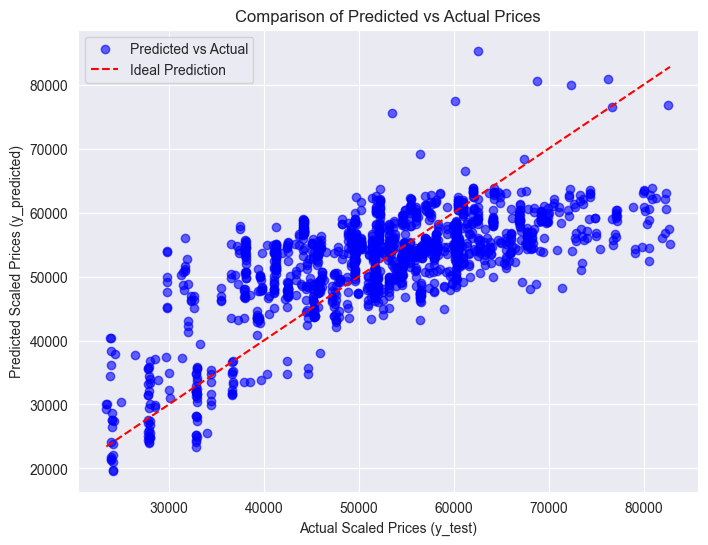

In [14]:
from utils import scatter
scatter(scaled_back_test.flatten(), scaled_back_pred.flatten())